# Cell Size Distribution of Microbial Communities

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import sys
!conda install --yes --prefix {sys.prefix} sympy
from sympy import *
import scipy as sc
init_printing() # for pretty-printing equations etc
from scipy import integrate
from scipy.stats import beta
import math
import pandas as pd

Solving environment: ...working... done

# All requested packages already installed.



### Temperature-corrected Lotka-Volterra model with mass scaling

$\frac{dN}{dt} = N_{i}Y_{0}V_{i}^{\alpha-1}e^{\frac{-E}{kT}}(1 + \sum \limits _{j}a_{ij}(V_{i},T)N_{j})$<br>

Parameter|Dimension|Possible Values
-----|-----|----- 
$N$|$M$|-
$V$|$M^{3}$|~$10^{-3}$ to $10^{3}$ $\mu$m$^{3}$
$\alpha-1$|-|$0.8$
$Y_{0}$|$(TM)^{-1}$|$2.597*10^{19}$ 
$e^{\frac{-E}{kT}}$|-|$10^{-14}$ (for E = 0.85)
$a_{ij}(m_{i},T)$|$M^{-1}$|$10^{-3}$ to $10^{3}$

According to DeLong the scaling exponent $\alpha$ for prokaryotes lies between 1.65 and 2.14 and not 0.75 like in vertebrates (Kleiber's Law). So, $\alpha-1$ would be between 0.65 and 1.14. Knowing $\alpha$ is important to determine the possible values of $Y_{0}$. <br>


In [5]:
Tcorr = math.exp(-0.85/(8.62*10**(-5)*310)) #Temperature correction
Tcorr*(10**(-7))**0.8

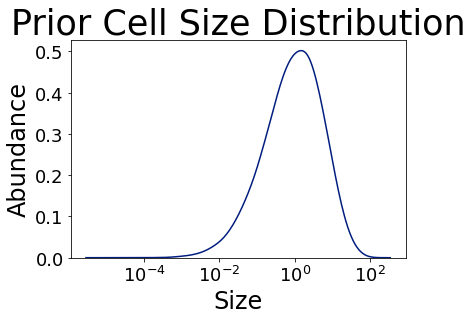

In [73]:
#prior distribution
m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=100000, random_state=None)**10
plt.style.use(plt.style.available[15])  #15,25, 27
sns.kdeplot(m, bw_method=0.2, log_scale=True)
plt.xlabel('Size',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Prior Cell Size Distribution', size=35)
plt.tick_params(axis='both', which='both', labelsize = '18')
plt.savefig('AbundancePlot_Prior.png', dpi=300, bbox_inches='tight')

In [70]:
mean, var, skew, kurt = beta.stats(10, 10,loc=0.2,scale=1.6, moments='mvsk')
mean, var, skew, kurt

(array(1.), array(0.03047619), array(0.), array(-0.26086957))

###### Competition and Cooperation

done


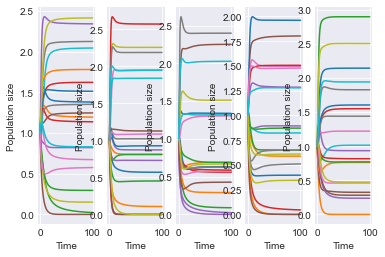

In [72]:
#define a function to calculate the sum in the equation
def sumf(Competition, Species, i):
    x = 0
    for j in range(len(Species)):
        x = x + Competition[i][j]*Species[j]
    return(x)

#model and solution
def LV(N1N2, t, Y0, m, alpha, Tcorr, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*Y0*m[i]**(alpha-1)*Tcorr*(1 + sumf(a, N1N2, i))
    return dN_dt

#global Parameters
t_vec = np.arange(0, 100., 0.01)
Species = 20 #number of species in the system
Runs = 5 #number of simulations
Y0 = 2.597*10**13
alpha = 0.6
Tcorr = math.exp(-0.85/(8.62*10**(-5)*310))

plt.style.use('seaborn-darkgrid')  
fig, axs = plt.subplots(1, Runs)
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])

for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = ((random.rand(Species,Species)-0.5)/2) #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution and Plot
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
    axs[n].plot(t_vec, N1N2_vec)
    axs[n].set_xlabel('Time')
    axs[n].set_ylabel('Population size')
    
    #plot final size distribution
    #axs[1,n].plot(m,N1N2_vec[10000-1],'bo')
    #axs[1,n].set_xlabel('size')
    #axs[1,n].set_ylabel('abundance')
    
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]
    
print('done')


##### Final size distribution:

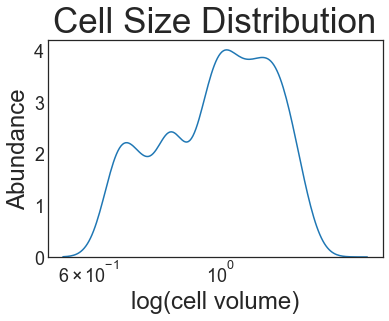

In [70]:
m_f = np.concatenate(m_final)
N_f = np.concatenate(N1N2_final)
        
plt.style.use(plt.style.available[25])  #15,25, 27        
sns.kdeplot(m_f, bw_method=0.25, weights=N_f, log_scale=True)
plt.xlabel('log(cell volume)',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Cell Size Distribution', size=35)
plt.tick_params(axis='both', which='both', labelsize = '18')
plt.savefig('AbundancePlot_Mixed.png', dpi=300, bbox_inches='tight')


##### A nice dynamics plot:

done


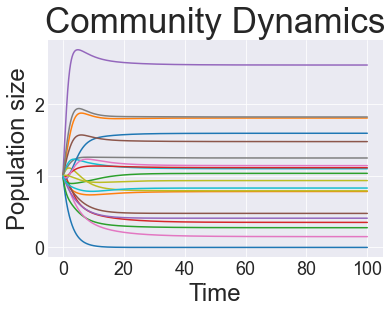

In [107]:
#define a function to calculate the sum in the equation
def sumf(Competition, Species, i):
    x = 0
    for j in range(len(Species)):
        x = x + Competition[i][j]*Species[j]
    return(x)

#model and solution
def LV(N1N2, t, Y0, m, alpha, Tcorr, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*Y0*m[i]**(alpha-1)*Tcorr*(1 + sumf(a, N1N2, i))
    return dN_dt

#global Parameters
t_vec = np.arange(0, 100., 0.01)
Species = 20 #number of species in the system
Runs = 1 #number of simulations
Y0 = 2.597*10**13
alpha = 1.8
Tcorr = math.exp(-0.85/(8.62*10**(-5)*310))

plt.style.use('seaborn-darkgrid')  
fig, axs = plt.subplots(1)
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])

for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = ((random.rand(Species,Species)-0.5)/2) #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution and Plot
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
    plt.style.use(plt.style.available[25])
    plt.plot(t_vec, N1N2_vec)
    plt.xlabel('Time', fontsize = 24)
    plt.ylabel('Population size', fontsize = 24)
    plt.title('Community Dynamics', size=35)
    plt.tick_params(axis='both', which='both', labelsize = '18')
    plt.savefig('Dynamics_Plot.png', dpi=300, bbox_inches='tight')
    
    
print('done')


#### Prior Distributions

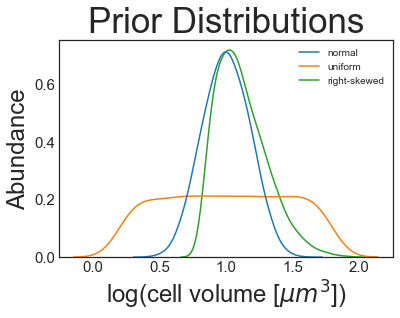

In [17]:
n=beta.rvs(10,10,loc=0.2, scale=1.6,size=10000, random_state=None)
u=beta.rvs(1,1,loc=0.2,scale=1.6, size=10000, random_state=None)
r=beta.rvs(2,8,loc=0.8, scale=1.6,size=10000, random_state=None)
index = np.arange(0,10000,1)
data=pd.DataFrame({'normal':n,'uniform':u,'right-skewed':r}, index=index)
data
sns.kdeplot(data=data, bw_method=0.25)
plt.xlabel('log(cell volume [$\mu m^3$])',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Prior Distributions', size=35)
plt.tick_params(axis='both', which='both', labelsize = '15')

### Competition vs Mutualism

In [56]:
#set functions and parameters
def sumf(Competition, Species, i):
    x = 0
    for j in range(len(Species)):
        x = x + Competition[i][j]*Species[j]
    return(x)

#model and solution
def LV(N1N2, t, Y0, m, alpha, Tcorr, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*Y0*m[i]**(alpha-1)*Tcorr*(1 + sumf(a, N1N2, i))
    return dN_dt

#global Parameters
t_vec = np.arange(0, 100., 0.01)
Species = 20 #number of species in the system
Runs = 50 #number of simulations
Y0 = 2.597*10**13
alpha = 1.8
Tcorr = math.exp(-0.85/(8.62*10**(-5)*310))
print('done')

done


In [57]:
#competition
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = -random.rand(Species,Species)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_fc = np.concatenate(m_final)
N_fc = np.concatenate(N1N2_final)    
print('done')

done


In [64]:
#mutualism
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = -random.rand(Species,Species)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_fm = np.concatenate(m_final)
N_fm = np.concatenate(N1N2_final)    
print('done')

done


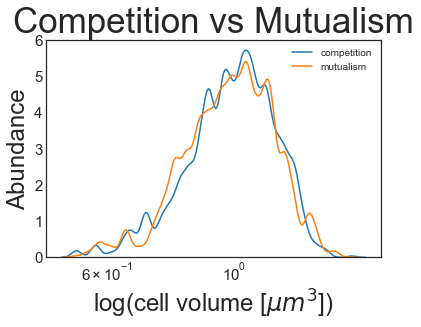

In [65]:
plt.style.use(plt.style.available[25])  #15,25, 27        
sns.kdeplot(x=m_fc, bw_method=0.1, weights=N_fc, log_scale=True, label='competition')
sns.kdeplot(x=m_fm, bw_method=0.1, weights=N_fm, log_scale=True, label='mutualism')
plt.legend()
plt.xlabel('log(cell volume [$\mu m^3$])',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Competition vs Mutualism', size=35)
plt.tick_params(axis='both', which='both', labelsize = '15')

#plt.savefig('AbundancePlot_Competition.png', dpi=300, bbox_inches='tight')

## Results for Different Prior Distributions

In [41]:
#set functions and parameters
def sumf(Competition, Species, i):
    x = 0
    for j in range(len(Species)):
        x = x + Competition[i][j]*Species[j]
    return(x)

#model and solution
def LV(N1N2, t, Y0, m, alpha, Tcorr, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*Y0*m[i]**(alpha-1)*Tcorr*(1 + sumf(a, N1N2, i))
    return dN_dt

#global Parameters
t_vec = np.arange(0, 100., 0.01)
Species = 20 #number of species in the system
Runs = 50 #number of simulations
Y0 = 2.597*10**13
alpha = 1.8
Tcorr = math.exp(-0.85/(8.62*10**(-5)*310))
print('done')

done


In [42]:
#normal distribution
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = (random.rand(Species,Species)-0.5)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_f_normal = np.concatenate(m_final)
N_f_normal = np.concatenate(N1N2_final)    
print('done')

done


In [43]:
#uniform distribution
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(1, 1,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = (random.rand(Species,Species)-0.5)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_f_uniform = np.concatenate(m_final)
N_f_uniform = np.concatenate(N1N2_final)   
print('done')

done


In [44]:
#right-skewed distribution
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(2, 8,loc=0.8, scale=1.6,size=Species, random_state=None)
    a = (random.rand(Species,Species)-0.5)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_f_skewed = np.concatenate(m_final)
N_f_skewed = np.concatenate(N1N2_final)    
print('done')

done


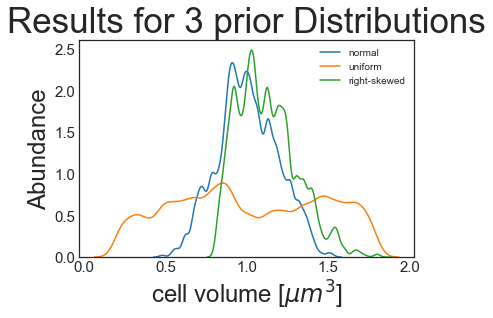

In [46]:
plt.style.use(plt.style.available[25])  #15,25, 27        
sns.kdeplot(x=m_f_normal, bw_method=0.1, weights=abs(N_f_normal), label='normal')
sns.kdeplot(x=m_f_uniform, bw_method=0.1, weights=abs(N_f_uniform), label='uniform')
sns.kdeplot(x=m_f_skewed, bw_method=0.1, weights=abs(N_f_skewed), label='right-skewed')
plt.legend()
plt.xlabel('cell volume [$\mu m^3$]',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Results for 3 prior Distributions', size=35)
plt.tick_params(axis='both', which='both', labelsize = '15')

### Prior Distributions compared to final distribution

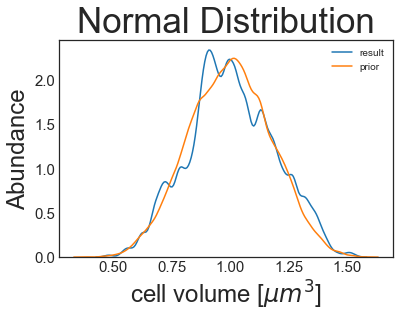

In [47]:
n=beta.rvs(10,10,loc=0.2, scale=1.6,size=10000, random_state=None)
sns.kdeplot(x=m_f_normal, bw_method=0.1, weights=abs(N_f_normal), label='result')
sns.kdeplot(x=n, bw_method=0.1, label='prior')
plt.legend()
plt.xlabel('cell volume [$\mu m^3$]',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Normal Distribution', size=35)
plt.tick_params(axis='both', which='both', labelsize = '15')

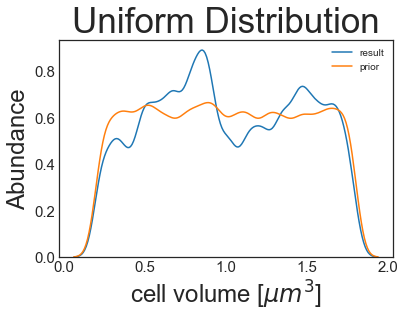

In [49]:
u=beta.rvs(1,1,loc=0.2,scale=1.6, size=10000, random_state=None)
sns.kdeplot(x=m_f_uniform, bw_method=0.1, weights=abs(N_f_uniform), label='result')
sns.kdeplot(x=u, bw_method=0.1, label='prior')
plt.legend()
plt.xlabel('cell volume [$\mu m^3$]',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Uniform Distribution', size=35)
plt.tick_params(axis='both', which='both', labelsize = '15')

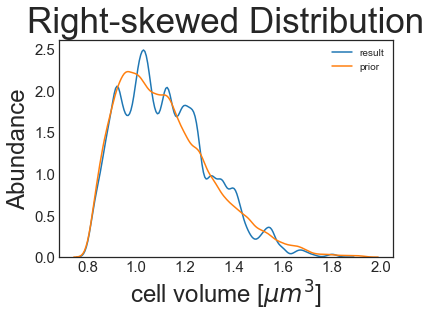

In [50]:
r=beta.rvs(2,8,loc=0.8, scale=1.6,size=10000, random_state=None)
sns.kdeplot(x=m_f_skewed, bw_method=0.1, weights = abs(N_f_skewed), label='result')
sns.kdeplot(x=r, bw_method=0.1, label='prior')
plt.legend()
plt.xlabel('cell volume [$\mu m^3$]',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Right-skewed Distribution', size=35)
plt.tick_params(axis='both', which='both', labelsize = '15')

### Different values for alpha with normal distribution

In [51]:
#set functions and parameters
def sumf(Competition, Species, i):
    x = 0
    for j in range(len(Species)):
        x = x + Competition[i][j]*Species[j]
    return(x)

#model and solution
def LV(N1N2, t, Y0, m, alpha, Tcorr, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*Y0*m[i]**(alpha-1)*Tcorr*(1 + sumf(a, N1N2, i))
    return dN_dt

#global Parameters
t_vec = np.arange(0, 100., 0.01)
Species = 20 #number of species in the system
Runs = 50 #number of simulations
Y0 = 2.597*10**13
Tcorr = math.exp(-0.85/(8.62*10**(-5)*310))

$\alpha$ = 1.8 (DeLong)

In [52]:
alpha = 1.8
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = (random.rand(Species,Species)-0.5)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_f_18 = np.concatenate(m_final)
N_f_18 = np.concatenate(N1N2_final)    
print('done')

done


$\alpha$ = 0.75 (Kleiber's Law)

In [53]:
alpha = 0.75
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = (random.rand(Species,Species)-0.5)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_f_075 = np.concatenate(m_final)
N_f_075 = np.concatenate(N1N2_final)    
print('done')

done


$\alpha$ = 0.6 (Hira's Masters Thesis, which is for volume instead of mass)

In [54]:
alpha = 0.6
m_final = np.zeros([Runs, Species])
N1N2_final = np.zeros([Runs, Species])
for n in range(Runs): #run simulation multiple times
    #local Parameters
    m=[]
    a=[]
    m = beta.rvs(10, 10,loc=0.2, scale=1.6,size=Species, random_state=None)
    a = (random.rand(Species,Species)-0.5)/2 #competition matrix
    for i in range(Species):
        a[i][i] = -1 #Diagonals = -1 (Carrying Capacity)

    #initial condition
    N10N20 = np.ones(Species)
    
    #ODE Solution
    N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (Y0, m, alpha, Tcorr, a))
       
    #save final size distribution in a cumulative array
    m_final[n] = m_final[n] + m
    N1N2_final[n] = N1N2_final[n] + N1N2_vec[10000-1]

m_f_06 = np.concatenate(m_final)
N_f_06 = np.concatenate(N1N2_final)    
print('done')

done


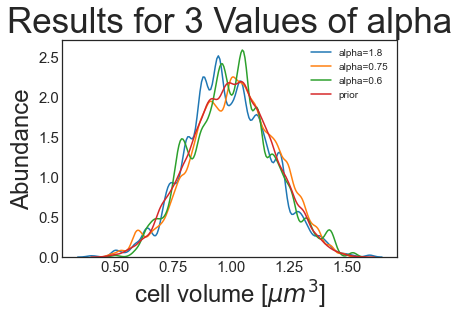

In [55]:
plt.style.use(plt.style.available[25])  #15,25, 27    
n=beta.rvs(10,10,loc=0.2, scale=1.6, size=10000, random_state=None)
sns.kdeplot(x=m_f_18, bw_method=0.1, weights=abs(N_f_18), label='alpha=1.8')
sns.kdeplot(x=m_f_075, bw_method=0.1, weights=abs(N_f_075), label='alpha=0.75')
sns.kdeplot(x=m_f_06, bw_method=0.1, weights=abs(N_f_06), label='alpha=0.6')
sns.kdeplot(x=n, bw_method=0.1, label='prior')
plt.legend()
plt.xlabel('cell volume [$\mu m^3$]',fontsize=24)
plt.ylabel('Abundance', fontsize=24)
plt.title('Results for 3 Values of alpha', size=35)
plt.tick_params(axis='both', which='both', labelsize = '15')

### Different values for aij